In [1]:
from PIL import Image
import os
import cv2
import sys
import numpy as np
from typing import List
from matplotlib import pyplot as plt
sys.path.append('../..')

In [2]:
from app.parse_image_service.parse_image_utils import (
    preprocess_image,
    extract_grid_cell_patches
)

LOCAL_TEMP_DIR = '/home/ubuntu/repositories/sudoku-ml-vision-app/temporary'

In [3]:
def build_grid_image(image_patches: List[np.array]) -> np.array:
    
    assert len(image_patches) == 81
    
    columns = []
    
    for i in range(0,81,9):
        columns.append(np.concatenate(image_patches[i:(i+9)],axis=1))
    
    grid_image = np.concatenate(columns,axis=0)
    
    return grid_image

In [4]:
sample_image_path = f'{LOCAL_TEMP_DIR}/sudoku-grid-images/manual-extracts/grid-27.PNG'
sample_image = cv2.imread(sample_image_path)
preprocessed_sudoku_image = preprocess_image(sample_image)
_, _, ordered_image_patches, _ = extract_grid_cell_patches(preprocessed_sudoku_image, order_patches=True)
_, _, image_patches, _ = extract_grid_cell_patches(preprocessed_sudoku_image, order_patches=False)

len(image_patches), len(ordered_image_patches), ordered_image_patches[0].shape, image_patches[0].shape

(81, 81, (100, 100), (100, 100))

In [5]:
grid_sample_image = build_grid_image(image_patches)
grid_sample_image.shape

(900, 900)

In [6]:
ordered_grid_sample_image = build_grid_image(ordered_image_patches)
ordered_grid_sample_image.shape

(900, 900)

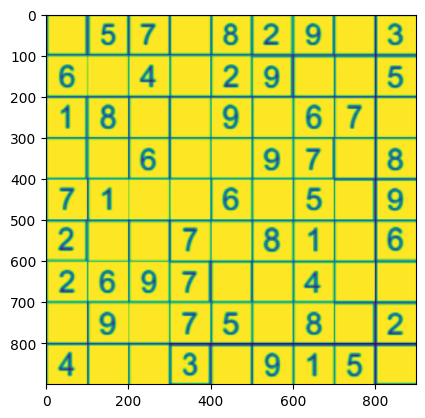

In [7]:
plt.imshow(grid_sample_image)
plt.show()

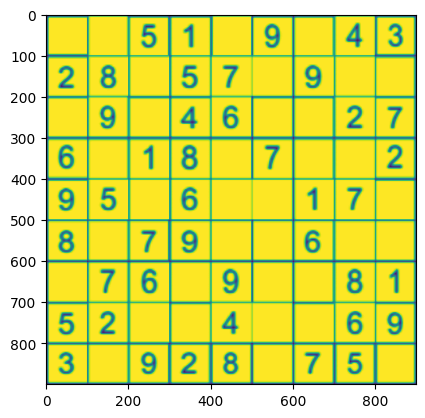

In [8]:
plt.imshow(ordered_grid_sample_image)
plt.show()

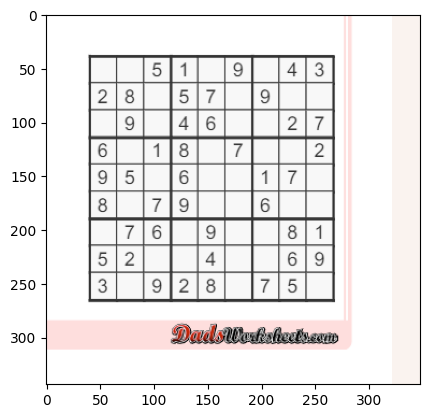

In [9]:
plt.imshow(sample_image)
plt.show()